### Batch Gradient Descent with early stopping for Softmax Regression
Implementing Batch gradient descent and softmax regression without using scikit learn api

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [2]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
X = iris["data"][:, (2, 3)] #[petal width]
y = iris["target"]

Add bias term for every instance

In [7]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [8]:
np.random.seed(2552)

Splitting the data set just like `train_test_split()`

In [9]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model.

In [10]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

Try out the function

In [11]:
y_train[:10]

array([0, 1, 2, 1, 2, 0, 1, 0, 2, 2])

In [12]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [14]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_on_hot = to_one_hot(y_test)

Implement the Softmax function

In [15]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [16]:
np.unique(y_train)

array([0, 1, 2])

In [17]:
n_inputs = X_train.shape[1] #==3 (2 features plus bias)
n_outputs = len(np.unique(y_train)) #==3 (3 iris classes)

## Training

In [19]:
eta = 0.01 #learning rate
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        #Cross entropy cost/loss
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    #Cross entropy gradient
    gradients = 1/m * X_train.T.dot(error)
    #Adjust the Theta
    Theta = Theta - eta * gradients

0 1.5472038980575349
500 0.7147475102795815
1000 0.6257299674083637
1500 0.5668644333110865
2000 0.5245352841487066
2500 0.49222962494960876
3000 0.4664855545646762
3500 0.4452957343476624
4000 0.42741325581137474
4500 0.4120201477096066
5000 0.3985558308454922


In [20]:
Theta

array([[ 3.04768021, -0.96613633, -3.14551338],
       [-0.85751688,  0.47808171,  0.20550719],
       [-0.81230273, -0.10054523,  2.11966281]])

Try to make predictions on the validation set

In [21]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
Y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(Y_predict == y_valid)
accuracy_score

0.9333333333333333

## Training with Regularization

In [23]:
eta = 0.01 #learning rate
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1 #regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        #Cross entropy cost/loss
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = (1/2 * np.sum(np.square(Theta[1:]))) ** 0.5
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    #Cross entropy gradient
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    #Adjust the Theta
    Theta = Theta - eta * gradients

0 2.912681121949814
500 0.8103043122086696
1000 0.7118666324231955
1500 0.6623692970344037
2000 0.6328462624442688
2500 0.612667814920175
3000 0.5976269975382391
3500 0.5857845517227218
4000 0.5761138597910417
4500 0.5680100250793548
5000 0.5610873381095519


In [24]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
Y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(Y_predict == y_valid)
accuracy_score

1.0

## Training with Regularization and Early Stopping

In [25]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    #Cross entropy gradient
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    #Cross entropy loss
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 2.448413413018582
500 0.5288181595235167
1000 0.5058980129641619
1500 0.4995640155430167
2000 0.49764654496315014
2500 0.4971862282694276
2687 0.4971635826606994
2688 0.4971635833858519 early stopping!


In [26]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
Y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(Y_predict == y_valid)
accuracy_score

0.9666666666666667

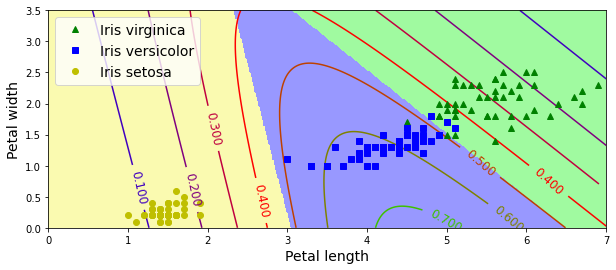

In [28]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
Y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = Y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [29]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
Y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(Y_predict == y_test)
accuracy_score

1.0